In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Speficy each path

In [2]:
dataset = "HandGestureDataSet/model/number.csv"
model_save_path = 'HandGestureDataSet/model/hand_number.hdf5'
tflite_save_path = 'HandGestureDataSet/model/hand_number.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset Reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Building

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [8]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [9]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
43/43 [==============================] - 3s 46ms/step - loss: 1.8010 - accuracy: 0.2064 - val_loss: 1.7796 - val_accuracy: 0.3209

Epoch 00001: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 2/1000
43/43 [==============================] - 0s 8ms/step - loss: 1.7833 - accuracy: 0.2122 - val_loss: 1.7500 - val_accuracy: 0.4092

Epoch 00002: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 3/1000
43/43 [==============================] - 0s 8ms/step - loss: 1.7554 - accuracy: 0.2529 - val_loss: 1.7143 - val_accuracy: 0.4866

Epoch 00003: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 4/1000
43/43 [==============================] - 0s 8ms/step - loss: 1.7385 - accuracy: 0.2655 - val_loss: 1.6532 - val_accuracy: 0.5464

Epoch 00004: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 5/1000
43/43 [==============================] - 0s 8ms/step - loss: 1.6891 - accuracy: 0.3062 - val_loss: 1.5446 - val_accuracy: 0.6506



43/43 [==============================] - 0s 8ms/step - loss: 0.8229 - accuracy: 0.6968 - val_loss: 0.4381 - val_accuracy: 0.9578

Epoch 00039: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 40/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.8054 - accuracy: 0.7092 - val_loss: 0.4033 - val_accuracy: 0.9709

Epoch 00040: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 41/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.7780 - accuracy: 0.7170 - val_loss: 0.4119 - val_accuracy: 0.9682

Epoch 00041: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 42/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.7696 - accuracy: 0.7110 - val_loss: 0.4112 - val_accuracy: 0.9742

Epoch 00042: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 43/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.7750 - accuracy: 0.7194 - val_loss: 0.3846 - val_accuracy: 0.9638

Epoch 0004

43/43 [==============================] - 0s 8ms/step - loss: 0.6535 - accuracy: 0.7538 - val_loss: 0.2938 - val_accuracy: 0.9863

Epoch 00077: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 78/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.6634 - accuracy: 0.7691 - val_loss: 0.2970 - val_accuracy: 0.9846

Epoch 00078: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 79/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.6204 - accuracy: 0.7761 - val_loss: 0.2757 - val_accuracy: 0.9852

Epoch 00079: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 80/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.6551 - accuracy: 0.7552 - val_loss: 0.2939 - val_accuracy: 0.9863

Epoch 00080: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 81/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.6410 - accuracy: 0.7715 - val_loss: 0.2914 - val_accuracy: 0.9846

Epoch 0008

43/43 [==============================] - 0s 8ms/step - loss: 0.5931 - accuracy: 0.7906 - val_loss: 0.2910 - val_accuracy: 0.9852

Epoch 00115: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 116/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.5689 - accuracy: 0.8037 - val_loss: 0.2894 - val_accuracy: 0.9874

Epoch 00116: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 117/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.5885 - accuracy: 0.7772 - val_loss: 0.3026 - val_accuracy: 0.9797

Epoch 00117: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 118/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.5404 - accuracy: 0.8058 - val_loss: 0.3012 - val_accuracy: 0.9852

Epoch 00118: saving model to HandGestureDataSet/model\hand_number.hdf5
Epoch 119/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.5603 - accuracy: 0.7975 - val_loss: 0.2793 - val_accuracy: 0.9852

Epoch 

In [10]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.9753


In [11]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [12]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00202306 0.91124827 0.07467701 0.00688065 0.00323144 0.00193953]
1


# Confusion Matrix

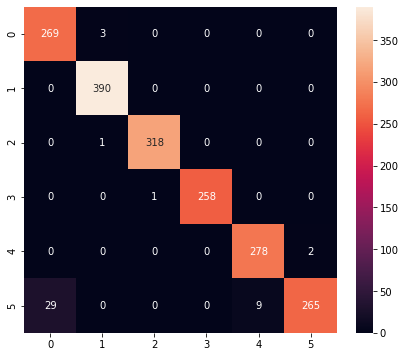

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       272
           1       0.99      1.00      0.99       390
           2       1.00      1.00      1.00       319
           3       1.00      1.00      1.00       259
           4       0.97      0.99      0.98       280
           5       0.99      0.87      0.93       303

    accuracy                           0.98      1823
   macro avg       0.98      0.97      0.97      1823
weighted avg       0.98      0.98      0.98      1823



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert Model to Tensorflow Lite

In [14]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [15]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmptojjvlng\assets


6448

# Inference Test

In [16]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [17]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [18]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [19]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [20]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00202307 0.91124827 0.07467702 0.00688066 0.00323144 0.00193953]
1
